<a href="https://colab.research.google.com/github/degr8sid-code/DataScience-BusinessAnalyticsTask/blob/main/ExploratoryDataAnalysisTerrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science and Business Analytics Internship**
## **GRIP @ The Sparks Foundation**
**Task 4: Exploratory Data Analysis - Terrorism**

**Objectives:**
*   As a security/defense analyst, try to find out the hot zone of terrorism.
*   What all security issues and insights you can derive by EDA?

by:

Sidrah Abdullah

### **Step 1: Importing the required files**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py

### **Step 2: Getting Data Ready**

In [10]:
terror=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [12]:
#Renaming the columns
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
#keeping few columns
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [13]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [14]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [15]:
terror['Wounded'] = terror['Wounded'].fillna(0)
terror['Killed'] = terror['Killed'].fillna(0)
terror['casualities']=terror['Killed']+terror['Wounded']

In [16]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       181691 non-null  float64
 10  Wounded      181691 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  181691 non-null  float64
dtypes: float64(5), int64(3),

### **Step 3: Exploratory Data Analysis**

For this analysis, we will try to answer some questions, such as:


1.   What are the number of terrorist attack each year?
2.   What attacking method has been used?
3.   Who are the targets of terrorist attack?
4.   Which region has the most number of terrorist attacks?
5.   Who are the most notorious groups?
6.   Number of people died due to terrorist attacks

To find the answer to above questions, we will perform EDA. 



In [17]:
#Highest Number
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


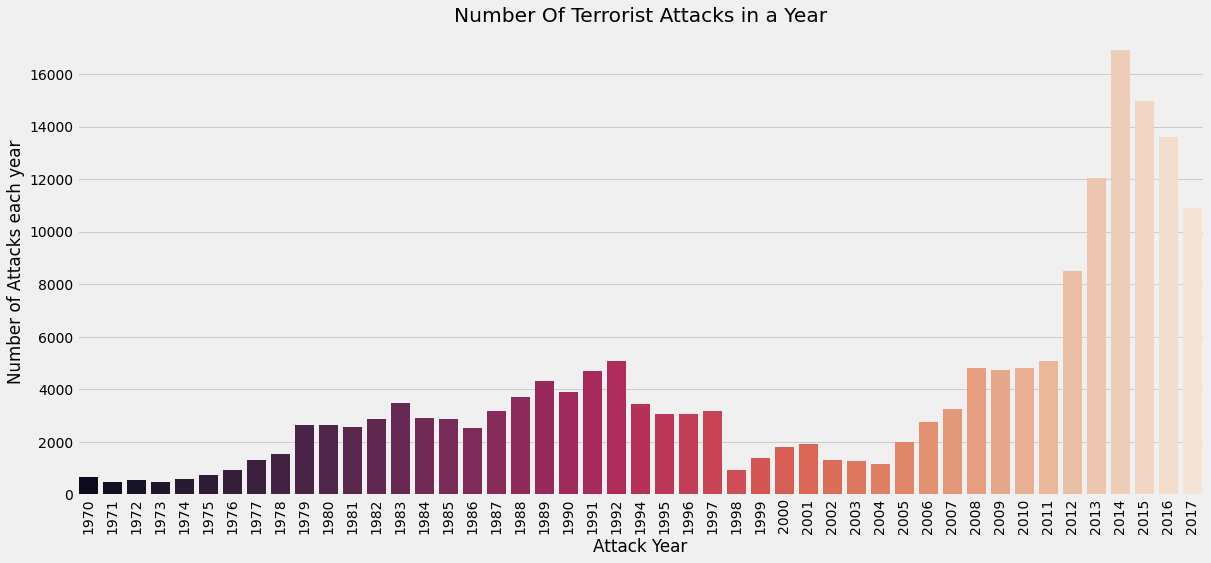

In [18]:
#Answer 1
unique_years=terror['Year'].unique()
years_count=terror['Year'].value_counts().sort_index()
plt.subplots(figsize=(18,8))
sns.barplot(x=unique_years, y=years_count, palette = 'rocket')
#sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.title('Number Of Terrorist Attacks in a Year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



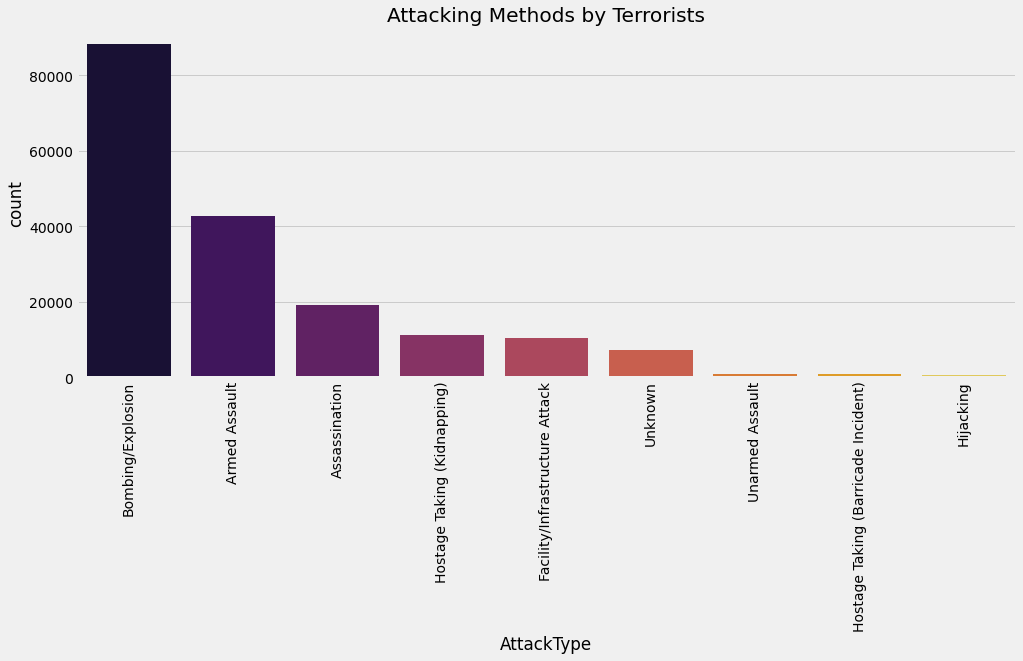

In [19]:
#Clearly the number of terrorist activities have gone up sharply after 2000.
#Answer 2
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



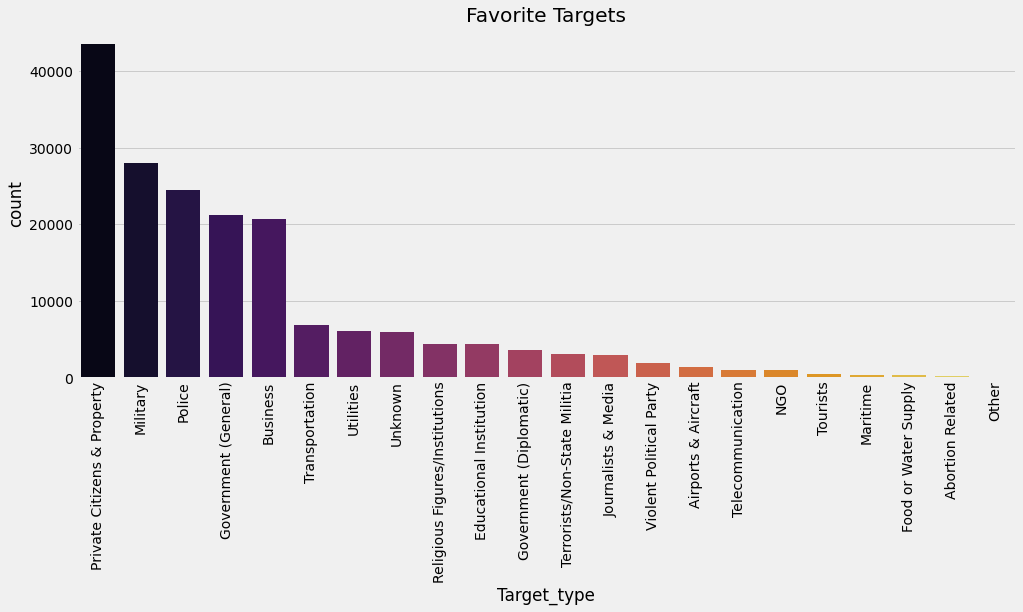

In [20]:
#Answer 3
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



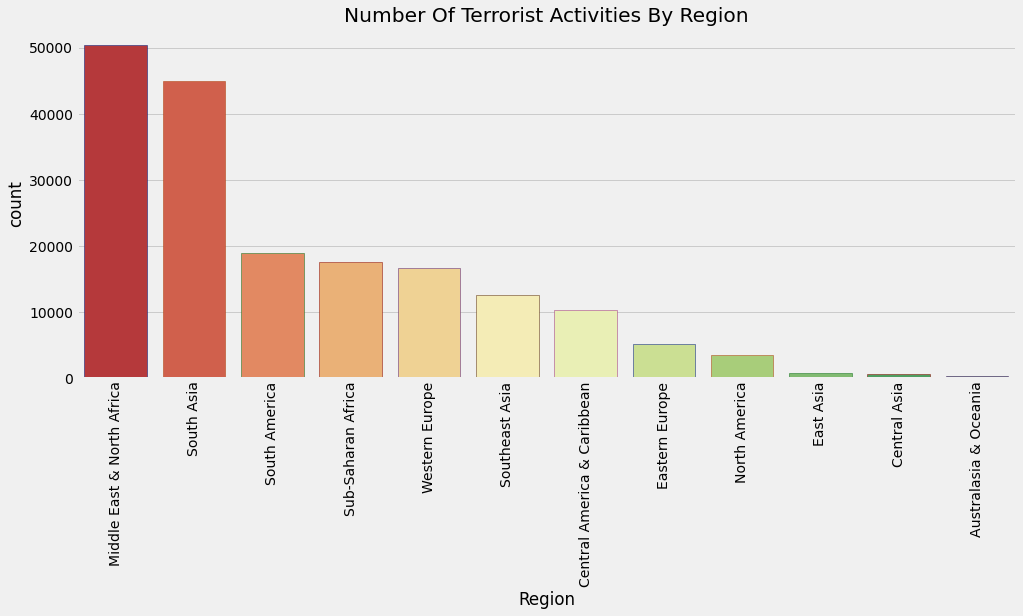

In [21]:
#Answer 4
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



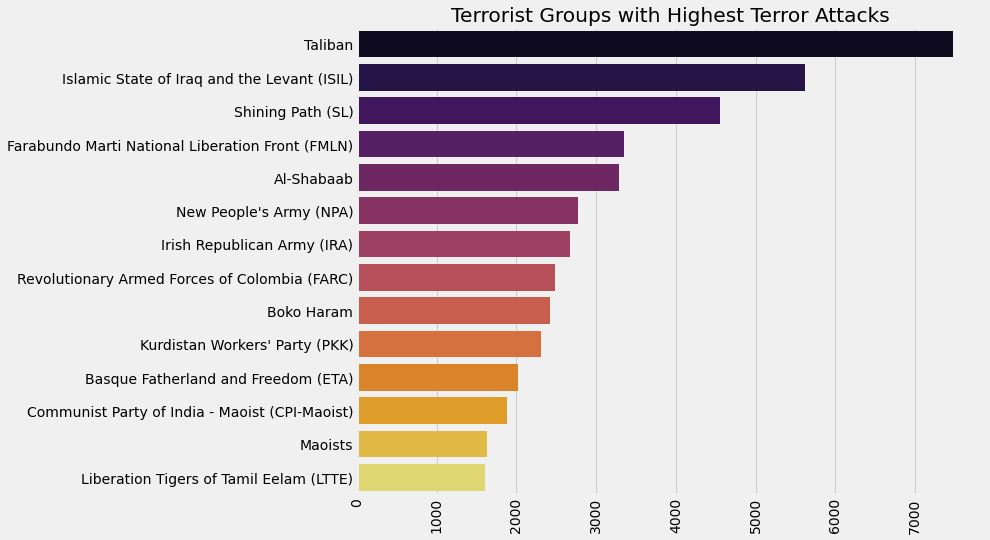

In [22]:
#The African and Asian Continent experience the highest terrorist attacks.
#Answer 5
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

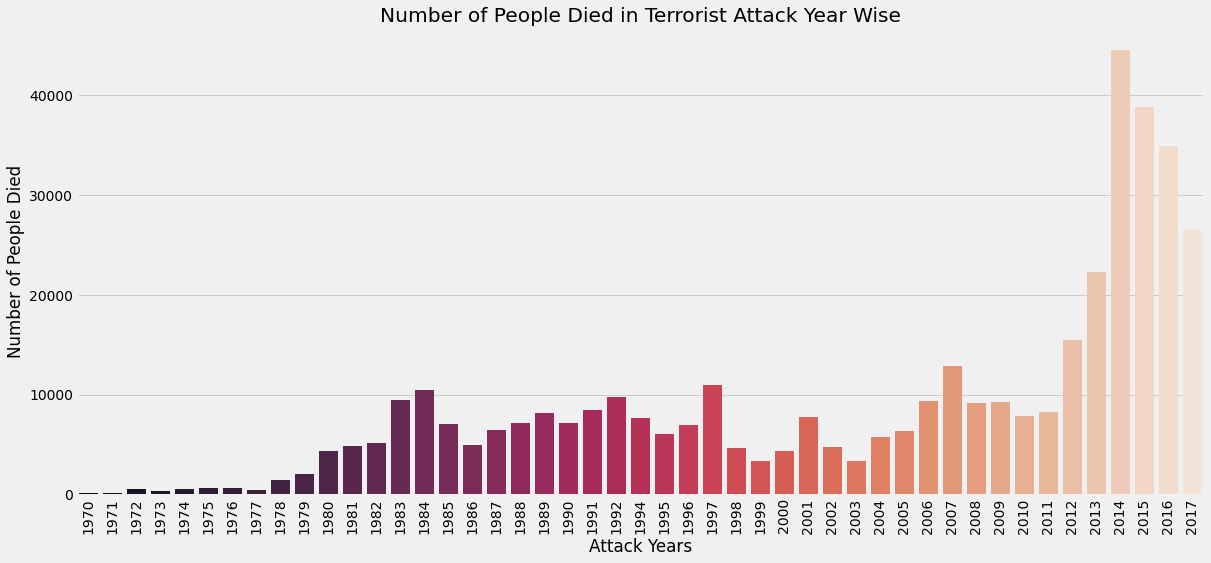

In [23]:
#Answer 6
yearKill = terror[['Year', 'Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(18,8))
sns.barplot(x=yearKill.index, y=yearKill.values.reshape(-1), palette = 'rocket')
#sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Attack Years')
plt.ylabel('Number of People Died')
plt.title('Number of People Died in Terrorist Attack Year Wise')
plt.show()

The maximum mumber of kills where high in the year 2014. The Highest number of attacks takes place in the year 2014. In region wise attack the Middle-East Region has a Highest attack range. The Highest number of Succesfull attacks takes place in the year 2014. In the year 2010-2020 the Hostage Taking (Barricade Incident, Kidnapping) takes place at a wider range. The most terrorist attacks done are by Taliban. The most number of attacks are on private citizens.